In [1]:
# Author: Ruidi Zhao
# Time: 06/01/2021
# Data Source: https://datahack.analyticsvidhya.com/contest/black-friday/#LeaderBoard

In [127]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

# Read Data

In [129]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [128]:
print(train.shape)
train.head()

(412551, 16)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Median_Product_Purchase,Median_User_Purchase,has_cat_3,has_cat_2
25152,1003864,P00159442,M,51-55,20,C,0,1,5,8.0,NaN,7027,6870.0,9889.5,True,False
381800,1004725,P00071242,M,36-45,5,A,2,0,1,15.0,16.0,11563,11764.0,8068.0,False,False
433582,1000774,P00127442,M,18-25,4,A,4+,0,1,2.0,15.0,11466,15201.0,8039.0,False,False
126732,1001542,P00005942,M,18-25,17,C,4+,0,2,4.0,9.0,6616,9974.0,11374.0,False,False
455644,1004112,P00152742,M,46-50,18,B,3,1,5,NaN,NaN,7171,6995.5,8653.0,True,True


In [5]:
print(test.shape)
test.head()
# Need to predict `Purchase`

(233599, 11)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


# Exploratory Data Analysis

In [114]:
data = train.copy()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


### `User_ID`

In [8]:
data['User_ID'].nunique()

5891

In [9]:
data['User_ID'].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529])

### `Product_ID`

In [10]:
data['Product_ID'].nunique()

3631

In [11]:
data['Product_ID'].unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00370293',
       'P00371644', 'P00370853'], dtype=object)

### `Gender`

In [12]:
data['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [13]:
data['Gender'].value_counts()/len(data) * 100

M    75.310507
F    24.689493
Name: Gender, dtype: float64

In [14]:
df = pd.DataFrame(data['Gender'].value_counts()).reset_index()
df.columns = ['Gender', 'Count']
df['Gender'] = ['Male', 'Female']
alt.Chart(df, title="Value Counts of Gender").mark_bar().encode(
    x="Gender:N", 
    y="Count:Q",
    tooltip=["Gender", "Count"]
).properties(width=250)

alt.Chart(...)

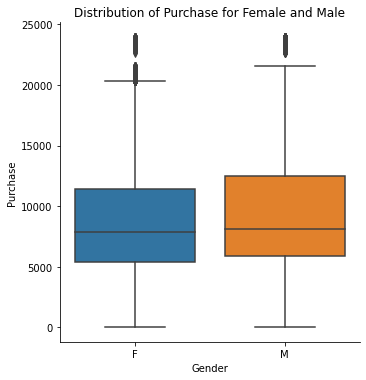

In [15]:
sns.catplot(x="Gender", y="Purchase", kind="box", data=data)
g = plt.title("Distribution of Purchase for Female and Male")

### `Age`

In [16]:
data['Age']

0          0-17
1          0-17
2          0-17
3          0-17
4           55+
          ...  
550063    51-55
550064    26-35
550065    26-35
550066      55+
550067    46-50
Name: Age, Length: 550068, dtype: object

In [17]:
data['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [18]:
df = pd.DataFrame(data['Age'].value_counts())
df = df.reindex(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
df.reset_index(inplace=True)
df.columns=['Age', 'Count']
alt.Chart(df, title="Value Counts of Age").mark_bar().encode(
    x="Age:O", 
    y=alt.Y("Count:Q",scale=alt.Scale(domain=(0, 240000))),
    tooltip=["Age", "Count"]
).properties(width=300)

alt.Chart(...)

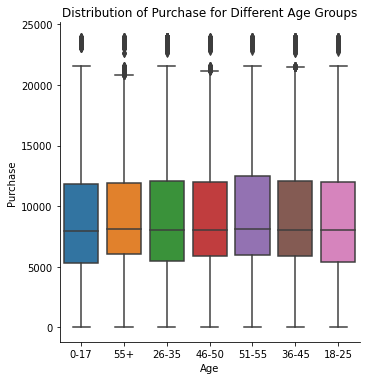

In [19]:
sns.catplot(x="Age", y="Purchase", kind="box", data=data)
g = plt.title("Distribution of Purchase for Different Age Groups")

### `Occupation`

Occupation (masked)

In [20]:
# Occupation code from 0 to 20
np.sort(data['Occupation'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

<AxesSubplot:>

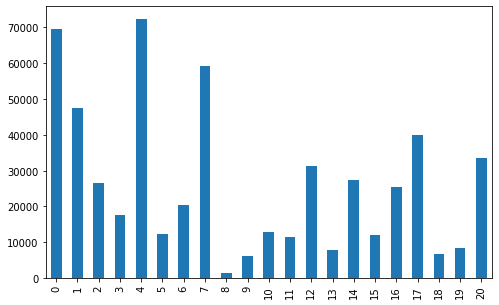

In [21]:
plt.figure(figsize=(8, 5))
data['Occupation'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:xlabel='Occupation'>

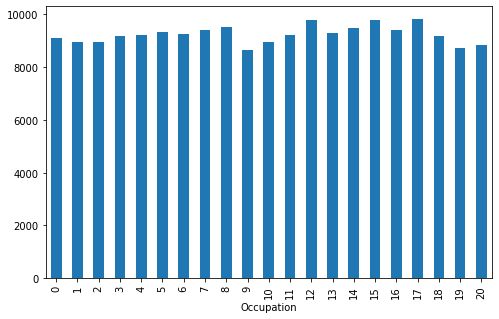

In [22]:
plt.figure(figsize=(8, 5))
data.groupby(['Occupation'])['Purchase'].mean().plot(kind='bar')

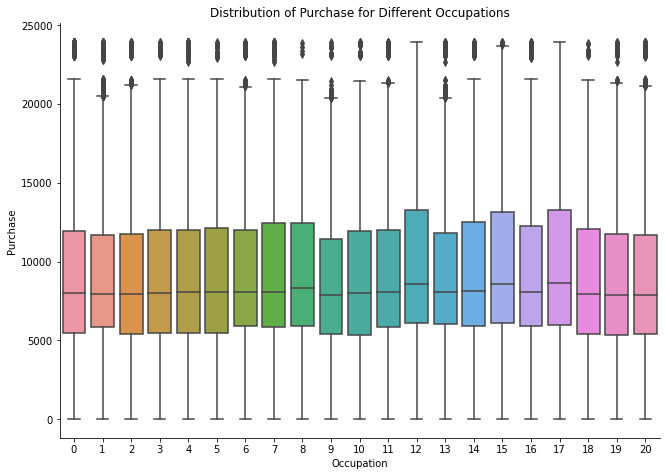

In [116]:
g = sns.catplot(
    x="Occupation", y="Purchase", kind="box", data=data
).set(title='Distribution of Purchase for Different Occupations')
g.fig.set_size_inches(10, 6.5)

### `City_Category`

In [23]:
data['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

<AxesSubplot:>

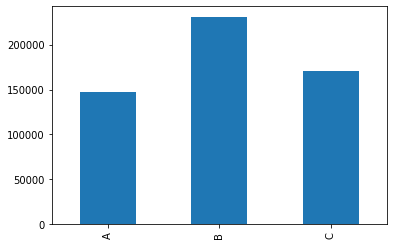

In [24]:
# plt.figure(figsize=(8, 5))
data['City_Category'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:xlabel='City_Category'>

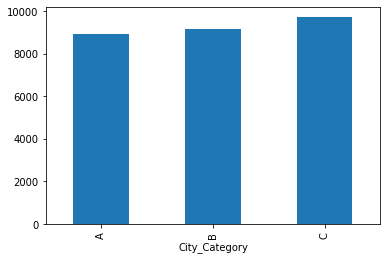

In [25]:
data.groupby(['City_Category'])['Purchase'].mean().plot(kind='bar')

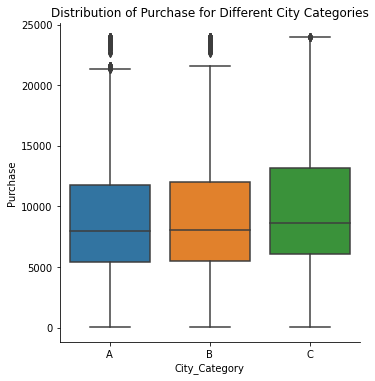

In [26]:
sns.catplot(x="City_Category", y="Purchase", kind="box", data=data, order=['A', 'B', 'C'])
g = plt.title("Distribution of Purchase for Different City Categories")

### `Stay_In_Current_City_Years`

In [27]:
data['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [28]:
data['Stay_In_Current_City_Years'].value_counts().sort_index()

0      74398
1     193821
2     101838
3      95285
4+     84726
Name: Stay_In_Current_City_Years, dtype: int64

<AxesSubplot:>

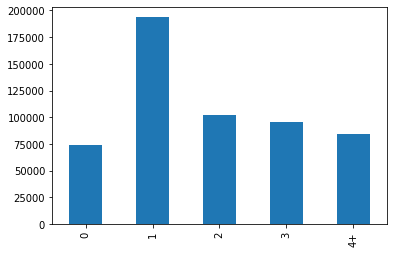

In [29]:
data['Stay_In_Current_City_Years'].value_counts().sort_index().plot(kind='bar')

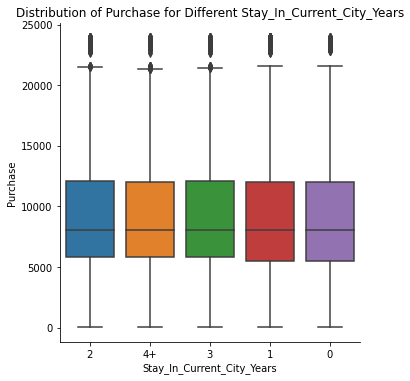

In [30]:
sns.catplot(x="Stay_In_Current_City_Years", y="Purchase", kind="box", data=data)
g = plt.title("Distribution of Purchase for Different Stay_In_Current_City_Years")

In [31]:
data.groupby(['Stay_In_Current_City_Years'])['Purchase'].mean()

Stay_In_Current_City_Years
0     9180.075123
1     9250.145923
2     9320.429810
3     9286.904119
4+    9275.598872
Name: Purchase, dtype: float64

<AxesSubplot:xlabel='Stay_In_Current_City_Years'>

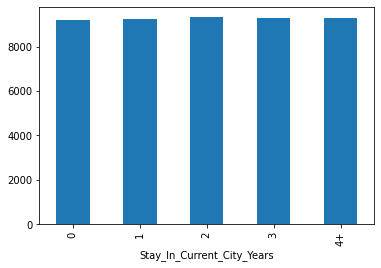

In [32]:
data.groupby(['Stay_In_Current_City_Years'])['Purchase'].mean().plot(kind='bar')

### `Marital_Status`

In [33]:
data['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

<AxesSubplot:>

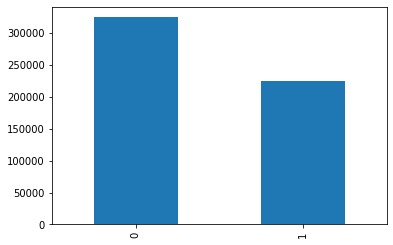

In [34]:
data['Marital_Status'].value_counts().plot(kind='bar')

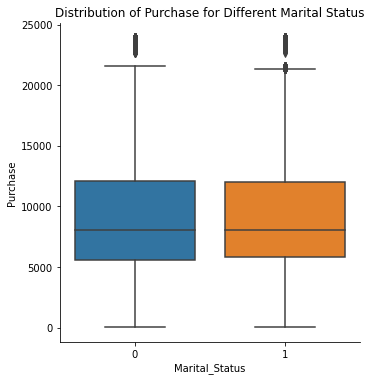

In [35]:
sns.catplot(x="Marital_Status", y="Purchase", kind="box", data=data)
g = plt.title("Distribution of Purchase for Different Marital Status")

In [36]:
data.groupby(['Marital_Status'])['Purchase'].mean()
# Nearly no difference

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

### `Product_Category_1`

In [37]:
sum(data['Product_Category_1'].isna())

0

In [38]:
np.sort(data['Product_Category_1'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

<AxesSubplot:>

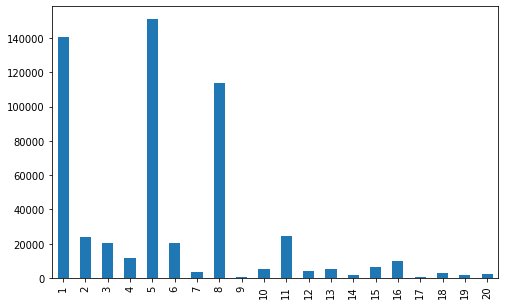

In [39]:
plt.figure(figsize=(8, 5))
data['Product_Category_1'].value_counts().sort_index().plot(kind='bar')

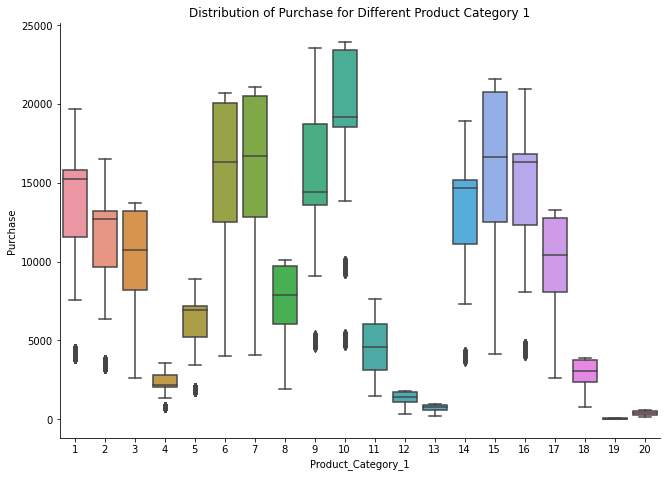

In [40]:
g = sns.catplot(
    x="Product_Category_1", y="Purchase", kind="box", data=data
).set(title='Distribution of Purchase for Different Product Category 1')
g.fig.set_size_inches(10, 6.5)

### `Product_Category_2`

In [41]:
sum(data['Product_Category_2'].isna())

173638

In [42]:
(data['Product_Category_2'].isna()).mean()

0.3156664266963357

In [43]:
data['Product_Category_2'].value_counts().sort_index()

2.0     49217
3.0      2884
4.0     25677
5.0     26235
6.0     16466
7.0       626
8.0     64088
9.0      5693
10.0     3043
11.0    14134
12.0     5528
13.0    10531
14.0    55108
15.0    37855
16.0    43255
17.0    13320
18.0     2770
Name: Product_Category_2, dtype: int64

<AxesSubplot:>

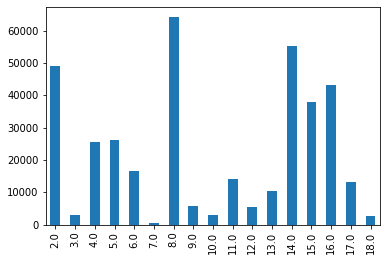

In [44]:
data['Product_Category_2'].value_counts().sort_index().plot(kind='bar')

In [45]:
# Set NA value to be category "-1"
data.loc[data['Product_Category_2'].isna(),'Product_Category_2'] = -1

<AxesSubplot:>

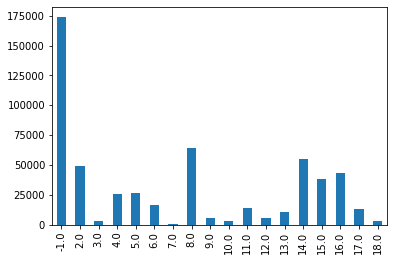

In [46]:
data['Product_Category_2'].value_counts().sort_index().plot(kind='bar')

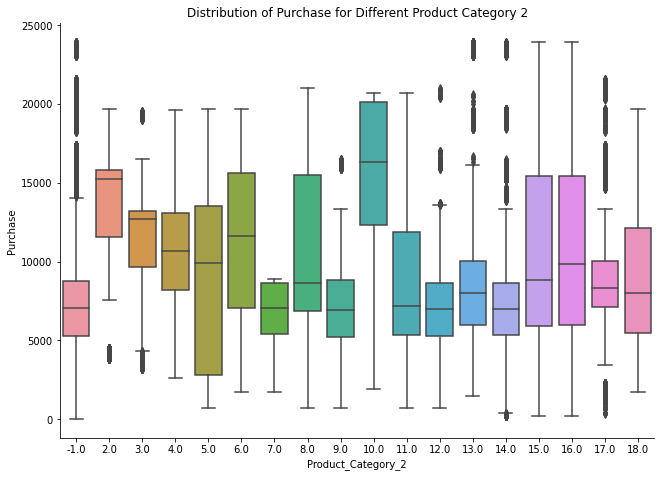

In [47]:
g = sns.catplot(
    x="Product_Category_2", y="Purchase", kind="box", data=data
).set(title='Distribution of Purchase for Different Product Category 2')
g.fig.set_size_inches(10, 6.5)

### `Product_Category_3`

In [48]:
(data['Product_Category_3'].isna()).mean()

0.6967265865311197

In [49]:
data['Product_Category_3'].value_counts().sort_index()

3.0       613
4.0      1875
5.0     16658
6.0      4890
8.0     12562
9.0     11579
10.0     1726
11.0     1805
12.0     9246
13.0     5459
14.0    18428
15.0    28013
16.0    32636
17.0    16702
18.0     4629
Name: Product_Category_3, dtype: int64

<AxesSubplot:>

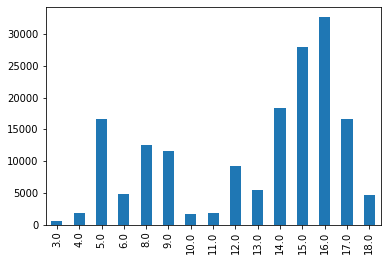

In [50]:
data['Product_Category_3'].value_counts().sort_index().plot(kind='bar')

In [51]:
# Set NA value to be category "-1"
data.loc[data['Product_Category_3'].isna(),'Product_Category_3'] = -1

<AxesSubplot:>

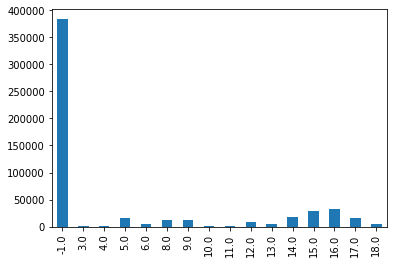

In [52]:
data['Product_Category_3'].value_counts().sort_index().plot(kind='bar')

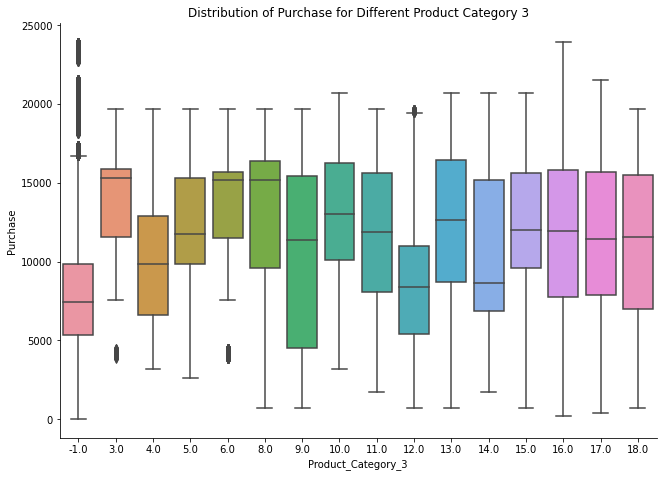

In [53]:
g = sns.catplot(
    x="Product_Category_3", y="Purchase", kind="box", data=data
).set(title='Distribution of Purchase for Different Product Category 3')
g.fig.set_size_inches(10, 6.5)

### `Purchase`

In [54]:
data['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

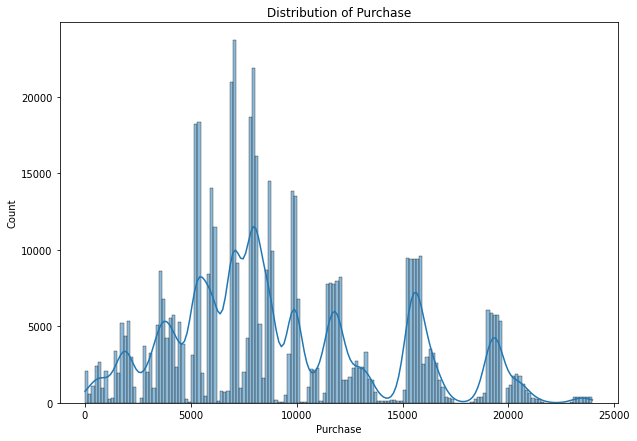

In [55]:
plt.figure(figsize=(10, 7))
g = sns.histplot(data['Purchase'], kde=True).set(title='Distribution of Purchase')
# Explanation of shape: the purchase amounts are pretty similar for the same product

In [56]:
corr_data = data.copy()
corr_data['Gender'].replace({'F':1, 'M':0}, inplace=True)
corr_data['Age'].replace({'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}, inplace=True)
corr_data['City_Category'].replace({'A':0, 'B':1, 'C':2}, inplace=True)
corr_data['Stay_In_Current_City_Years'].replace({'1': 0, '2':1, '3':2, '4+':3}, inplace=True)
corr_data.drop(['User_ID', 'Product_ID'], axis=1, inplace=True)
corr_data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,0,10,0,1,0,3,-1.0,-1.0,8370
1,1,0,10,0,1,0,1,6.0,14.0,15200
2,1,0,10,0,1,0,12,-1.0,-1.0,1422
3,1,0,10,0,1,0,12,14.0,-1.0,1057
4,0,6,16,2,3,0,8,-1.0,-1.0,7969


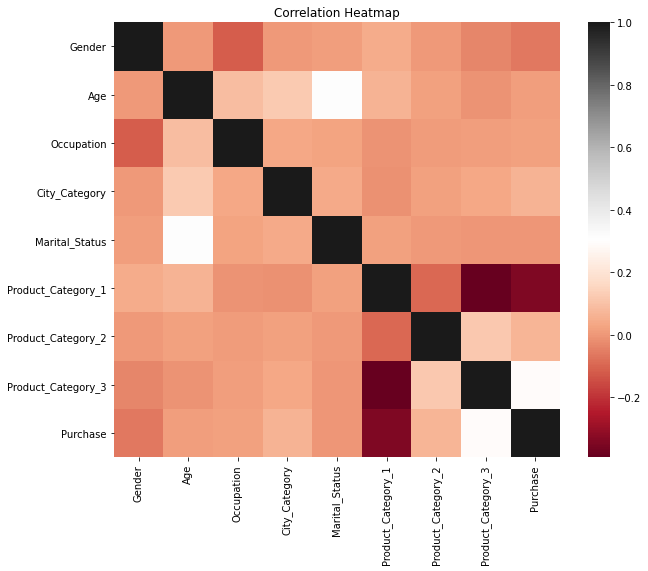

In [57]:
# Regular heatmap
plt.figure(figsize=(10, 8))
g = sns.heatmap(corr_data.corr(), cmap='RdGy').set(title='Correlation Heatmap')

In [58]:
corr_df = (corr_data.corr()).stack().reset_index()
corr_df.columns = ['First Variable', 'Second Variable', 'Correlation']
corr_df.head()

,First Variable,Second Variable,Correlation
0,Gender,Gender,1.000000
1,Gender,Age,0.004262
2,Gender,Occupation,-0.117291
3,Gender,City_Category,0.004515
4,Gender,Marital_Status,0.011603


In [59]:
# Heatmap with tooltip
alt.Chart(corr_df).mark_rect().encode(
    x="First Variable",
    y="Second Variable",
    color="Correlation",
    tooltip = ["First Variable", "Second Variable", "Correlation"]
).properties(width=400, height=400)

alt.Chart(...)

# Baseline Model

In [ ]:
# # Data preprocessing
# data.drop(['User_ID', 'Product_ID'], axis=1, inplace=True)
# data['Gender'].replace({'F':1, 'M':0}, inplace=True)
# data.loc[data['Product_Category_2'].isna(),'Product_Category_2'] = -1
# data.loc[data['Product_Category_3'].isna(),'Product_Category_3'] = -1
# data = pd.get_dummies(data, columns=['Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 
#                               'Product_Category_1', 'Product_Category_2', 'Product_Category_3'])
# data

In [ ]:
# X = data.drop('Purchase', axis=1)
# y = data['Purchase']

In [ ]:
# # Train the model
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor()
# model.fit(X, y)

In [ ]:
# # Data preprocessing for test set
# test_user_id = test['User_ID']
# test_product_id = test['Product_ID']
# #prediction_df = test[['User_ID', 'Product_ID']]
# test.drop(['User_ID', 'Product_ID'], axis=1, inplace=True)
# test['Gender'].replace({'F':1, 'M':0}, inplace=True)
# test.loc[test['Product_Category_2'].isna(),'Product_Category_2'] = -1
# test.loc[test['Product_Category_3'].isna(),'Product_Category_3'] = -1
# test = pd.get_dummies(test, columns=['Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 
#                               'Product_Category_1', 'Product_Category_2', 'Product_Category_3'])
# test

In [ ]:
# set(X.columns) - set(test.columns)

In [ ]:
# test['Product_Category_1_19'] = 0
# test['Product_Category_1_20'] = 0

In [ ]:
# # Make Prediction
# prediction = model.predict(test)

In [ ]:
# prediction_df = pd.DataFrame({
#     'Purchase': prediction,
#     'User_ID': test_user_id,
#     'Product_ID': test_product_id
# })
# prediction_df.head()

In [ ]:
# prediction_df.to_csv('1.csv')

# Data Preprocessing

In [94]:
# Split into train and validation set
from sklearn.model_selection import train_test_split
train, validation = train_test_split(train, test_size = 0.25)

### Features to be added:
1. **Median purchase amount of this product**; If product_ID not in train set, use the median purchase amount for all products in that cateogry
    - 3491 products in test set, 62 products not in train set
2. **Median purchase amount of this person**; 
    - `len(set(train['User_ID']).intersection(set(test['User_ID']))) == len(set(test['User_ID']))`
3. **IQR purchase amount of this product** ??

### Original Features:
1. `User_ID`, keeps to match the median purchase amount of this person
2. `Product_ID`, keeps to identiy the median purchase amount of this product
3. `Gender`, one-hot
4. `Age`, ordinal encoding
5. `Occupation`, one-hot
6. `City_Category`, one-hot
7. `Stay_In_Current_City_Years`, ordinal encoding
8. `Marital_Status`, leave it like this
9. `Product_Category_1`, one-hot
10. `Product_Cateogry_2`, binary variable 
11. `Product_Category_3`, binary variable 

In [141]:
# from collections import defaultdict
# median_purchase = train['Purchase'].median()
# product_purchase_dd = defaultdict(lambda: median_purchase) # default dict
product_purchase_d = train.groupby(['Product_ID'])['Purchase'].mean().to_dict()
purchase_1category_d = train.groupby(['Product_Category_1'])['Purchase'].mean().to_dict()
user_purchase_d = train.groupby(['User_ID'])['Purchase'].mean().to_dict()

def prepare_data(train):

    # New Feature: Median_Product_Purchase
    median_product_purchase = train['Product_ID'].map(product_purchase_d)
    train['Median_Product_Purchase'] = median_product_purchase
    
    purchase_by_cat = train['Product_Category_1'].map(purchase_1category_d)
    train['Median_Product_Purchase'].fillna(purchase_by_cat, inplace=True)
    
    # New Feature: Median_User_Purchase
    median_user_purchase = train['User_ID'].map(user_purchase_d)
    train['Median_User_Purchase'] = median_user_purchase
    
    # Process original features
    train = pd.get_dummies(train, columns=['Occupation', 'City_Category', 'Product_Category_1'])
    train['Gender'] = train['Gender'].replace({'F': 1, 'M': 0})
    train['Age'] = train['Age'].replace({'0-17': 0, '18-25': 1, '26-35': 2, '36-45': 3, 
                                         '46-50': 4, '51-55': 5, '55+': 6})
    train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].replace({'0': 0, '1': 1, '2': 2, 
                                                                                       '3': 3, '4+': 4})
    train['Product_Category_2'] = train['Product_Category_2'].isna()
    train['Product_Category_3'] = train['Product_Category_3'].isna()
    
    # 暂时 drop Product_Category_2
    # train.drop(['Product_Category_2'], axis=1, inplace=True)
    return train

# Model Selection

In [96]:
# train_: train set used in this section 
# validation: validation set used in this section 

In [103]:
# Preprocess training set
train_ = prepare_data(train)
train_X = train_.drop(['Purchase', 'User_ID', 'Product_ID'], axis=1)
train_y = train_['Purchase']

# Preprocess validation set
validation_ = prepare_data(validation)
validation_X = validation_.drop(['Purchase', 'User_ID', 'Product_ID'], axis=1)
validation_y = validation_['Purchase']

In [104]:
train_X.head()

,Gender,Age,Stay_In_Current_City_Years,Marital_Status,Product_Category_3,Median_Product_Purchase,Median_User_Purchase,Occupation_0,Occupation_1,Occupation_2,...,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Product_Category_1_19,Product_Category_1_20
25152,0,5,0,1,True,6870.0,9889.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
381800,0,3,2,0,False,11764.0,8068.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
433582,0,1,4,0,False,15201.0,8039.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
126732,0,1,4,0,False,9974.0,11374.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
455644,0,4,3,1,True,6995.5,8653.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
validation_X.head()

,Gender,Age,Stay_In_Current_City_Years,Marital_Status,Product_Category_3,Median_Product_Purchase,Median_User_Purchase,Occupation_0,Occupation_1,Occupation_2,...,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Product_Category_1_19,Product_Category_1_20
317542,0,5,2,1,True,7900.5,7878.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
303034,0,2,1,0,True,6908.5,8324.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53473,0,1,0,1,False,19093.5,6980.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
438582,0,2,2,0,True,15266.0,7915.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152279,0,2,2,1,False,12103.0,6489.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn.kernel_ridge import KernelRidge
import xgboost
from sklearn.metrics import mean_squared_error

MLA = [
    #Linear Model
    linear_model.Lasso(),
    linear_model.Ridge(),
    linear_model.ElasticNet(),
    
    #Ensemble
    ensemble.RandomForestRegressor(),
    #ensemble.GradientBoostingRegressor(),
    
    #XGB
    xgboost.XGBRegressor()
]

df = pd.DataFrame(columns = ['Name', 'Parameters', 'RMSE'])

for i in np.arange(len(MLA)):
    model = MLA[i]
    model_name = model.__class__.__name__
    model_parameters = str(model.get_params())
    model.fit(train_X, train_y)
    model_prediction = model.predict(validation_X)
    rmse = (mean_squared_error(model_prediction, validation_y)) ** 0.5
    df.loc[i,:] = [model_name, model_parameters, rmse]
    

df.sort_values('RMSE', ascending = False)

,Name,Parameters,CV score mean
2,ElasticNet,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",2678.007857
0,Lasso,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",2654.126174
1,Ridge,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",2651.351953
3,RandomForestRegressor,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",2609.954398
4,XGBRegressor,"{'objective': 'reg:squarederror', 'base_score'...",2510.912847


# Model Tuning

In [157]:
from sklearn.metrics import make_scorer
def neg_rmse(y_true, y_pred):
    return (-1) * np.sqrt(np.mean((y_true - y_pred) ** 2))
scorer = make_scorer(neg_rmse)

In [ ]:
from sklearn.model_selection import GridSearchCV

xgb_reg = xgboost.XGBRegressor(
)
parameters = {
    'eta':[0.1, 0.2, 0.3]
}
cv = GridSearchCV(estimator = xgb_reg, param_grid=parameters, scoring=scorer, n_jobs = -1, cv = 5)

cv.fit(X, y)

cv.best_params_

# Test Set Prediction

In [12]:
# X: train X
# y: train y
# test_X: test X

In [142]:
y = train['Purchase']
X = train.drop(['Purchase'], axis=1)

In [143]:
train_and_test_X = X.append(test, ignore_index=True)
train_and_test_X.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN


In [144]:
# Prepare_data
train_and_test_X = prepare_data(train_and_test_X)
train_and_test_X.head()

,User_ID,Product_ID,Gender,Age,Stay_In_Current_City_Years,Marital_Status,Product_Category_2,Product_Category_3,Median_Product_Purchase,Median_User_Purchase,...,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Product_Category_1_19,Product_Category_1_20
0,1000001,P00069042,1,0,2,0,True,True,11870.863436,9545.514286,...,0,0,0,0,0,0,0,0,0,0
1,1000001,P00248942,1,0,2,0,False,False,16304.030981,9545.514286,...,0,0,0,0,0,0,0,0,0,0
2,1000001,P00087842,1,0,2,0,True,True,1237.892157,9545.514286,...,0,1,0,0,0,0,0,0,0,0
3,1000001,P00085442,1,0,2,0,False,True,1455.140762,9545.514286,...,0,1,0,0,0,0,0,0,0,0
4,1000002,P00285442,0,6,4,0,True,True,7692.763547,10525.610390,...,0,0,0,0,0,0,0,0,0,0


In [145]:
train_and_test_X.drop(['User_ID', 'Product_ID'],axis=1, inplace=True)

In [146]:
X = train_and_test_X.loc[:550067]
X.head()

,Gender,Age,Stay_In_Current_City_Years,Marital_Status,Product_Category_2,Product_Category_3,Median_Product_Purchase,Median_User_Purchase,Occupation_0,Occupation_1,...,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Product_Category_1_19,Product_Category_1_20
0,1,0,2,0,True,True,11870.863436,9545.514286,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,2,0,False,False,16304.030981,9545.514286,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,2,0,True,True,1237.892157,9545.514286,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,2,0,False,True,1455.140762,9545.514286,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,6,4,0,True,True,7692.763547,10525.610390,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
test_X = train_and_test_X.loc[550068:]
test_X.head()

,Gender,Age,Stay_In_Current_City_Years,Marital_Status,Product_Category_2,Product_Category_3,Median_Product_Purchase,Median_User_Purchase,Occupation_0,Occupation_1,...,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Product_Category_1_19,Product_Category_1_20
550068,0,4,2,1,False,True,15781.118590,14747.714286,0,0,...,0,0,0,0,0,0,0,0,0,0
550069,0,2,0,0,False,True,11746.665354,10243.086207,0,0,...,0,0,0,0,0,0,0,0,0,0
550070,1,3,4,1,False,True,5731.338028,9728.744395,0,1,...,0,0,0,0,0,0,0,0,0,0
550071,1,3,4,1,False,True,1943.266667,9728.744395,0,1,...,0,0,0,0,0,0,0,0,0,0
550072,1,2,1,0,False,False,2585.590829,7957.471429,0,1,...,0,0,0,0,0,0,0,0,0,0


In [148]:
model = xgboost.XGBRegressor()
model.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [149]:
test_prediction = model.predict(test_X)

In [150]:
prediction_df = pd.DataFrame({
    'Purchase': test_prediction,
    'User_ID': test['User_ID'],
    'Product_ID': test['Product_ID']
})
prediction_df.head()

,Purchase,User_ID,Product_ID
0,17666.253906,1000004,P00128942
1,11848.456055,1000009,P00113442
2,6537.612305,1000010,P00288442
3,2461.830811,1000010,P00145342
4,2480.418945,1000011,P00053842


In [151]:
prediction_df.to_csv('4.csv')

In [155]:
# Feature Importance
(pd.DataFrame({"features": X.columns, "feature importance":model.feature_importances_})).\
    sort_values("feature importance", ascending=False).head(10)

,features,feature importance
6,Median_Product_Purchase,0.705678
7,Median_User_Purchase,0.027613
39,Product_Category_1_8,0.021570
31,City_Category_C,0.011810
0,Gender,0.011401
14,Occupation_6,0.009228
32,Product_Category_1_1,0.009188
34,Product_Category_1_3,0.008426
18,Occupation_10,0.007632
20,Occupation_12,0.007134


In [159]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Median_Product_Purchase,Median_User_Purchase,has_cat_3,has_cat_2
25152,1003864,P00159442,M,51-55,20,C,0,1,5,8.0,NaN,7027,6870.0,9889.5,True,False
381800,1004725,P00071242,M,36-45,5,A,2,0,1,15.0,16.0,11563,11764.0,8068.0,False,False
433582,1000774,P00127442,M,18-25,4,A,4+,0,1,2.0,15.0,11466,15201.0,8039.0,False,False
126732,1001542,P00005942,M,18-25,17,C,4+,0,2,4.0,9.0,6616,9974.0,11374.0,False,False
455644,1004112,P00152742,M,46-50,18,B,3,1,5,NaN,NaN,7171,6995.5,8653.0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378753,1004277,P00050242,M,36-45,16,A,0,0,8,NaN,NaN,8085,7979.5,9747.0,True,True
87268,1001451,P00127842,M,36-45,20,B,0,0,1,2.0,15.0,19699,15399.0,8731.0,False,False
517432,1001680,P00165642,M,26-35,20,A,3,1,1,8.0,16.0,15444,11803.0,7617.5,False,False
549327,1004966,P00375436,M,51-55,14,B,1,1,20,NaN,NaN,373,373.0,15501.0,True,True
